In [108]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-machine-learning-from-disaster/train.csv
/kaggle/input/titanic-machine-learning-from-disaster/test.csv


In [109]:
# 1、加载数据
train_data = pd.read_csv('/kaggle/input/titanic-machine-learning-from-disaster/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic-machine-learning-from-disaster/test.csv')

# 2、查看数据
print(train_data.head())
print(train_data.info())
#print(test_data.head())
#print(test_data.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

问题描述: 基于乘客的特征（如年龄、性别、船票等级等），预测乘客是否在泰坦尼克号沉船事件中幸存。

目标变量: Survived（1表示幸存，0表示未幸存）

输入特征: Pclass（船票等级）、Sex（性别）、Age（年龄）、Fare（票价）、Embarked（登船地点）等。

In [110]:
# 3、EDA-数据统计
print('-------Survived-----------')
print(train_data.value_counts('Survived'))
print('-------Age-----------')
print(train_data.value_counts('Age'))

-------Survived-----------
Survived
0    549
1    342
Name: count, dtype: int64
-------Age-----------
Age
24.00    30
22.00    27
18.00    26
30.00    25
28.00    25
         ..
20.50     1
14.50     1
12.00     1
0.92      1
80.00     1
Name: count, Length: 88, dtype: int64


下面是对于数据的探查，就是观测数据的质量，数据的分布等信息，由此我们可以发现：
1、哪些数据是可用的，哪些是不可用的
2、数据的分布情况
3、数据的关联关系

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

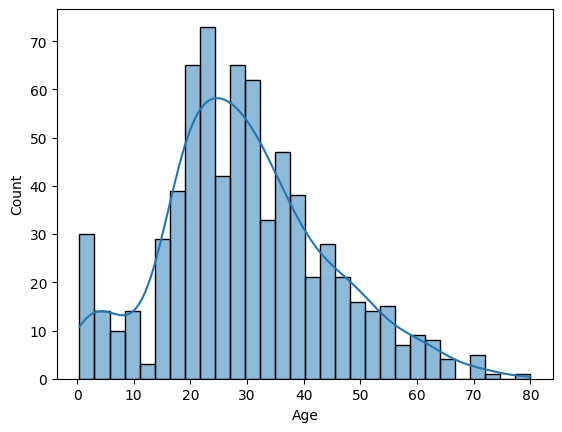

In [111]:
# 3、EDA-数据分析
# 用NaN替换无限值
#train.replace([np.inf, -np.inf], np.nan, inplace=True)
#pd.option_context('mode.use_inf_as_na', True)
# 图表数据分析--年龄分布
sns.histplot(train_data['Age'].dropna(), bins=30, kde=True)

<Axes: ylabel='count'>

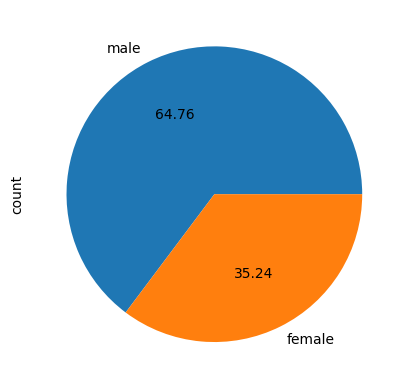

In [112]:
# 图表数据分析--性别比例
train_data['Sex'].value_counts().plot(kind='pie',autopct='%.2f')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Count'>

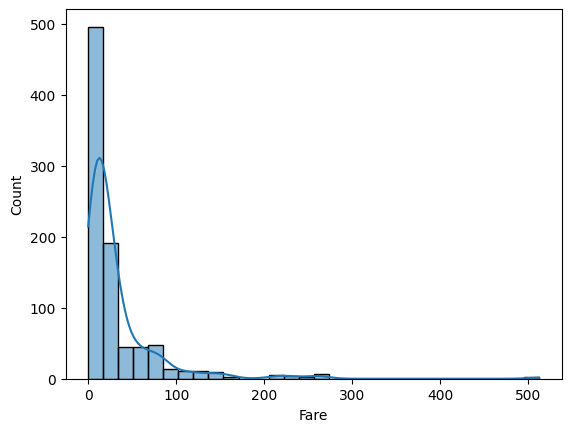

In [113]:
# 图表数据分析--票价分布
sns.histplot(train_data['Fare'], bins=30, kde=True)

<Axes: ylabel='count'>

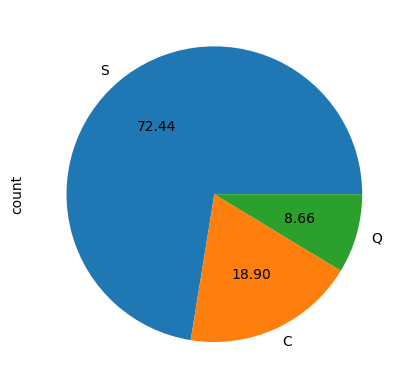

In [114]:
# 图表数据分析--Embark分布
train_data['Embarked'].value_counts().plot(kind='pie',autopct='%.2f')

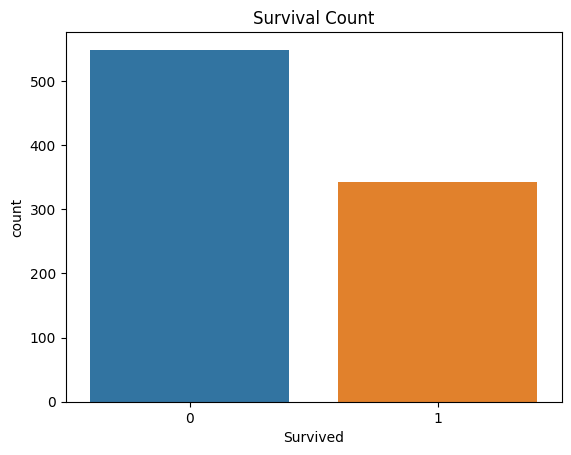

In [115]:
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Count')
plt.show()

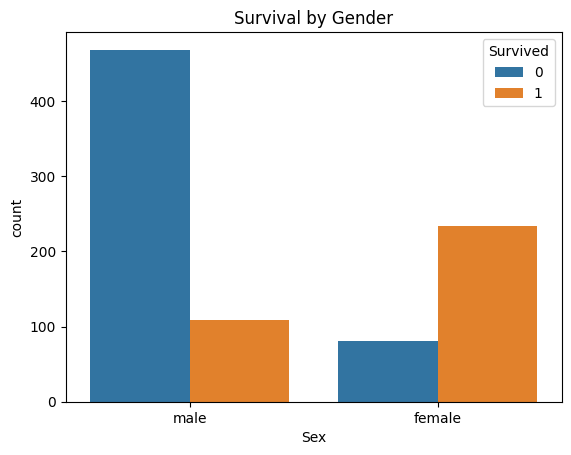

In [116]:
# 性别与幸存的关系
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Survival by Gender')
plt.show()

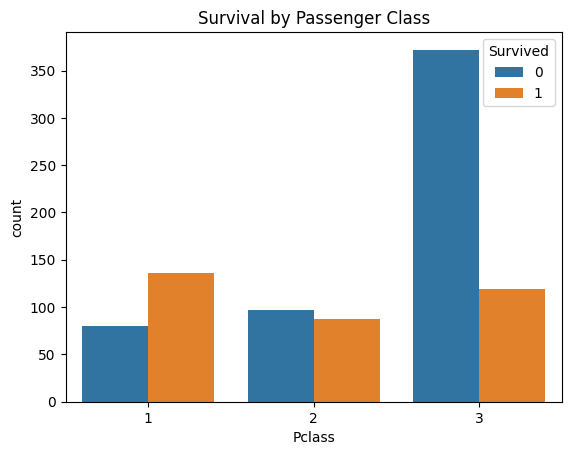

In [117]:
# 船票等级与幸存的关系
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title('Survival by Passenger Class')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

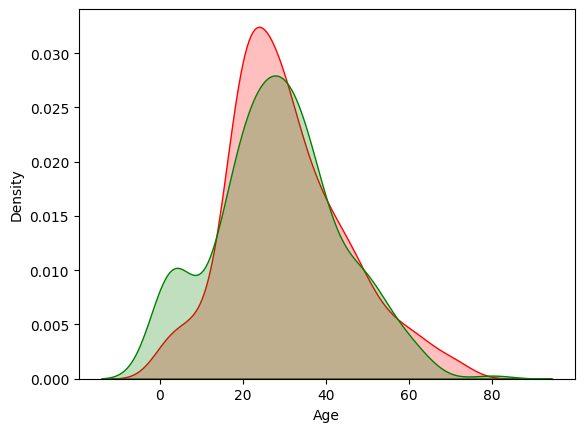

In [118]:
# 年龄与幸存的关系
sns.kdeplot(train_data['Age'][train_data['Survived'] == 0], color="red", label="Died", fill=True)
sns.kdeplot(train_data['Age'][train_data['Survived'] == 1], color="green", label="Survived", fill=True)

通过分析我们得出一些结论：

* 女性幸存率高于男性。
* 头等舱乘客幸存率更高。
* 年龄分布对幸存率有一定影响。


接下来
探查缺失的数据并且做相应的处理

Train-Null:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


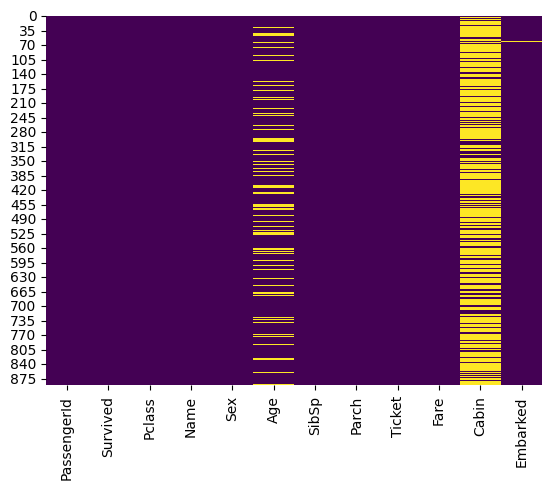

Test-Null:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


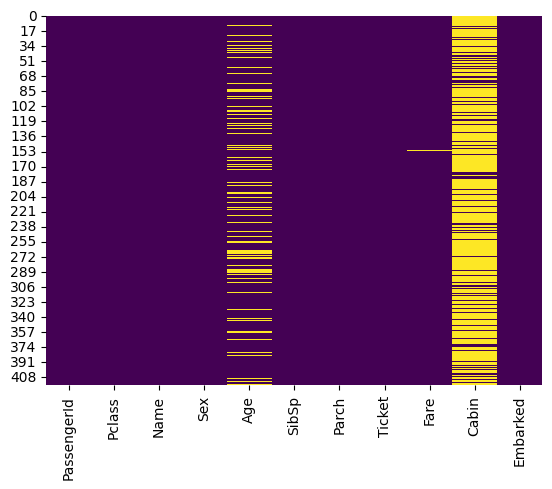

In [119]:
# 3、EDA-查看缺失值
print('Train-Null:')
print(train_data.isnull().sum())
# 可视化缺失值
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.show()


print('Test-Null:')
print(test_data.isnull().sum())
# 可视化缺失值
sns.heatmap(test_data.isnull(), cbar=False, cmap='viridis')
plt.show()


In [120]:
# 3、EDA-清理数据
# 填充缺失值（如Age列可以用中位数填充）
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# 将分类变量转换为数值（如Sex和Embarked）
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

# 删除无关特征
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

print(X_train.isnull().sum())
print(X_test.isnull().sum())

Pclass                  0
Sex                     0
Age                     0
SibSp                   0
Parch                   0
Fare                    0
FamilySize              0
IsAlone                 0
Embarked_1.0            0
Embarked_2.0            0
AgeGroup_Teen           0
AgeGroup_Young Adult    0
AgeGroup_Adult          0
AgeGroup_Senior         0
dtype: int64
Pclass                  0
Sex                     0
Age                     0
SibSp                   0
Parch                   0
Fare                    0
FamilySize              0
IsAlone                 0
Embarked_1              0
Embarked_2              0
AgeGroup_Teen           0
AgeGroup_Young Adult    0
AgeGroup_Adult          0
AgeGroup_Senior         0
dtype: int64


<ipython-input-120-22b15b84d488>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
<ipython-input-120-22b15b84d488>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

数据清理后才是可用状态

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  204 non-null    int64  
 1   Survived     204 non-null    int64  
 2   Pclass       204 non-null    int64  
 3   Name         204 non-null    object 
 4   Sex          204 non-null    int64  
 5   Age          204 non-null    float64
 6   SibSp        204 non-null    int64  
 7   Parch        204 non-null    int64  
 8   Ticket       204 non-null    object 
 9   Fare         204 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     204 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 20.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 12 to 414
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  91 non-null     int64  
 1   Pclass       

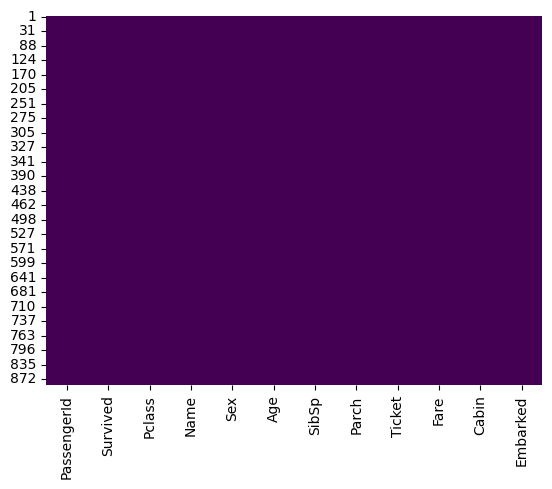

In [121]:
# 3、EDA-清理数据
# 清理后打印看效果
print(train_data.info())
print(test_data.info())
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.show()

先选择一个简单的分类模型进行训练和评估，查看训练效果

In [122]:
# 4、模型训练
# 特征选择
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_train = train_data[features]
y_train = train_data['Survived']
X_test = test_data[features]

#训练模型
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 训练模型
model = LogisticRegression()
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_train)

# 评估模型
accuracy = accuracy_score(y_train, y_pred)
print(f'Training Accuracy: {accuracy:.2f}')

Training Accuracy: 0.76



* 训练集准确率: 76% 是一个初步的结果，但我们需要确保模型没有过拟合或欠拟合。
* 交叉验证: 使用交叉验证来评估模型的泛化能力。
* 混淆矩阵: 查看分类结果的详细分布（如真正例、假正例等）。


In [123]:
from sklearn.model_selection import cross_val_score

# 交叉验证
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {scores.mean():.2f} (± {scores.std():.2f})')

Cross-Validation Accuracy: 0.74 (± 0.04)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

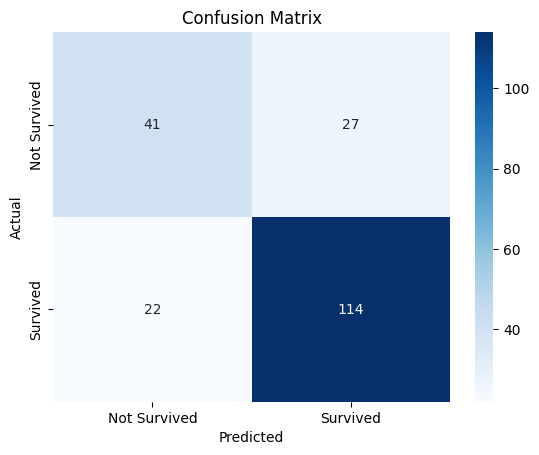

In [124]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 混淆矩阵
cm = confusion_matrix(y_train, y_pred)

# 可视化
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

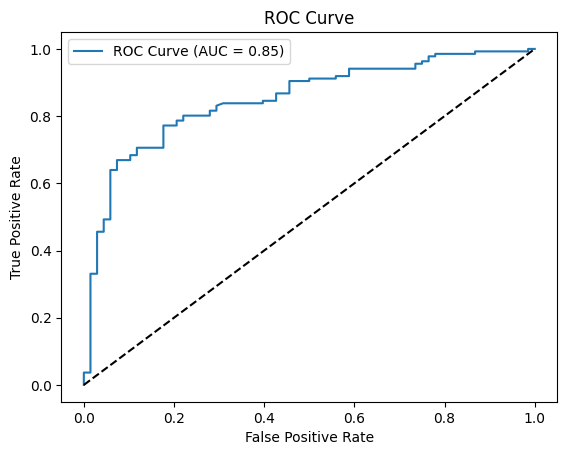

In [125]:
from sklearn.metrics import roc_curve, roc_auc_score

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(X_train)[:, 1])

# 计算AUC值
auc_score = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])

# 可视化
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 随机猜测的基线
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

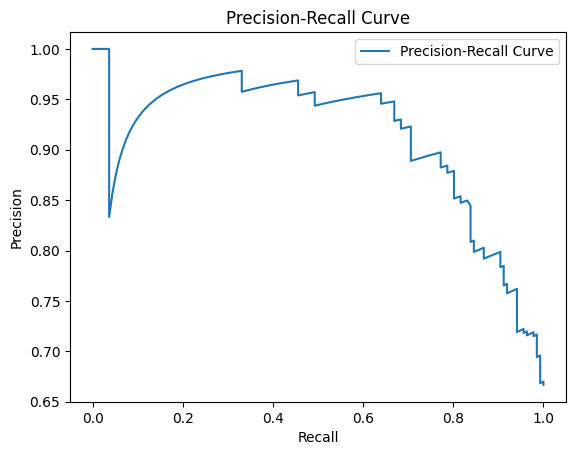

In [126]:
from sklearn.metrics import precision_recall_curve

# 计算精确率-召回率曲线
precision, recall, thresholds = precision_recall_curve(y_train, model.predict_proba(X_train)[:, 1])

# 可视化
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

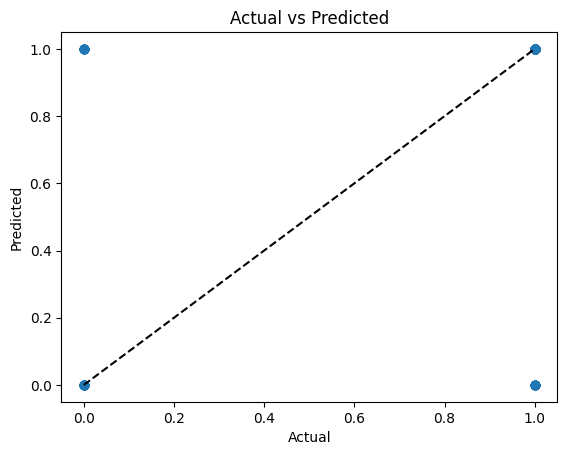

In [127]:
plt.scatter(y_train, y_pred, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--')  # 理想情况下的对角线
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

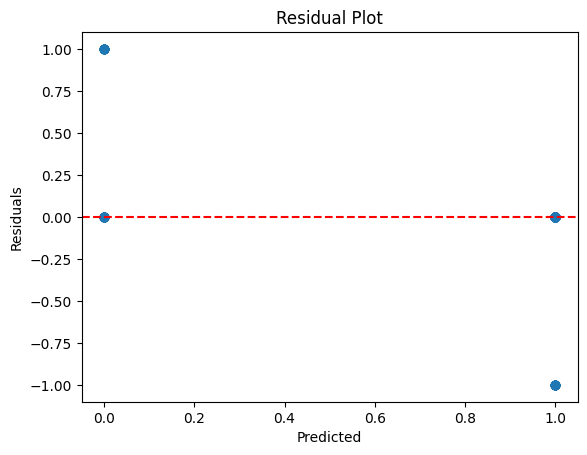

In [128]:
residuals = y_train - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # 残差为0的参考线
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


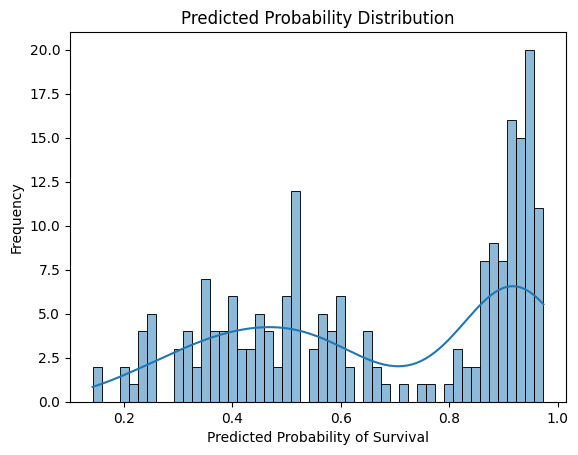

In [129]:
import seaborn as sns

# 获取预测概率
probabilities = model.predict_proba(X_train)[:, 1]

# 可视化
sns.histplot(probabilities, bins=50, kde=True)
plt.xlabel('Predicted Probability of Survival')
plt.ylabel('Frequency')
plt.title('Predicted Probability Distribution')
plt.show()

创建新特征提高模型的性能
* 家庭大小: 将SibSp（兄弟姐妹/配偶数量）和Parch（父母/子女数量）合并为一个新特征FamilySize
* 是否独自一人: 创建一个新特征IsAlone，表示乘客是否独自一人

分箱处理
* 年龄分箱: 将Age列分为几个区间（如儿童、青年、中年、老年）

独热编码
* 对分类变量（如Embarked、AgeGroup）进行独热编码



In [1]:
# 家庭大小
X_train['FamilySize'] = X_train['SibSp'] + X_train['Parch']
X_test['FamilySize'] = X_test['SibSp'] + X_test['Parch']

# 是否独自一人
X_train['IsAlone'] = (X_train['FamilySize'] == 0).astype(int)
X_test['IsAlone'] = (X_test['FamilySize'] == 0).astype(int)

# 年龄分箱
bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
X_train['AgeGroup'] = pd.cut(X_train['Age'], bins=bins, labels=labels)
X_test['AgeGroup'] = pd.cut(X_test['Age'], bins=bins, labels=labels)

# Embarked、AgeGroup 进行独热编码
X_train = pd.get_dummies(X_train, columns=['Embarked', 'AgeGroup'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Embarked', 'AgeGroup'], drop_first=True)


NameError: name 'X_train' is not defined

尝试其他模型
逻辑回归是一个简单的模型，可以尝试其他更复杂的模型，如随机森林、梯度提升树等。

In [131]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier

# 训练随机森林模型
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 预测
y_pred_rf = rf_model.predict(X_train)

# 评估模型
accuracy_rf = accuracy_score(y_train, y_pred_rf)
print(f'Random Forest Training Accuracy: {accuracy_rf:.2f}')

from sklearn.model_selection import GridSearchCV

# 定义参数网格
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# 网格搜索
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 最佳参数
print(f'Best Parameters: {grid_search.best_params_}')

# 使用最佳参数重新训练模型
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_train)
accuracy_best = accuracy_score(y_train, y_pred_best)
print(f'Best Model Training Accuracy: {accuracy_best:.2f}')

Random Forest Training Accuracy: 1.00
Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best Model Training Accuracy: 0.92


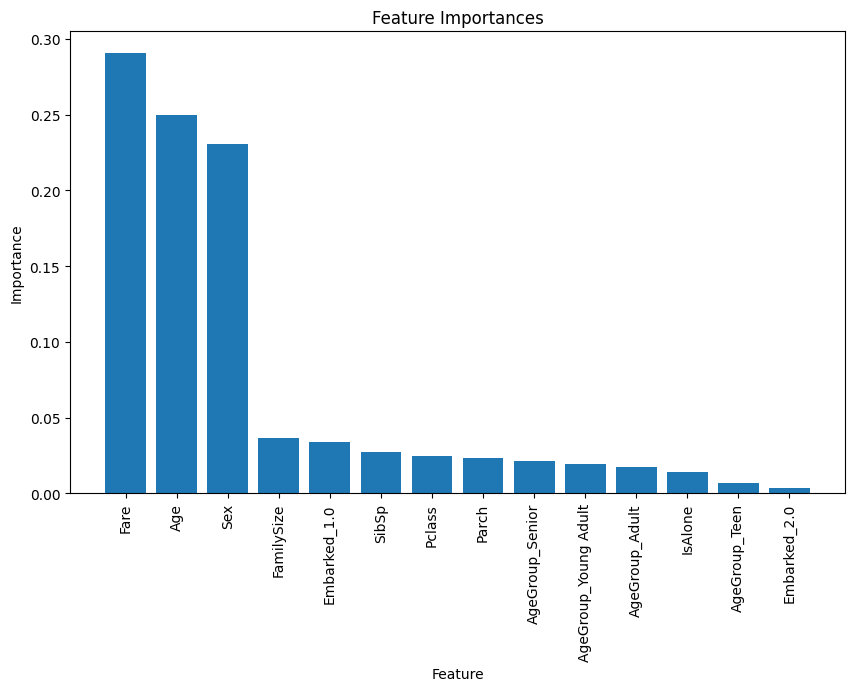

In [132]:
import numpy as np

# 获取特征重要性
feature_importances = rf_model.feature_importances_

# 可视化
features = X_train.columns
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

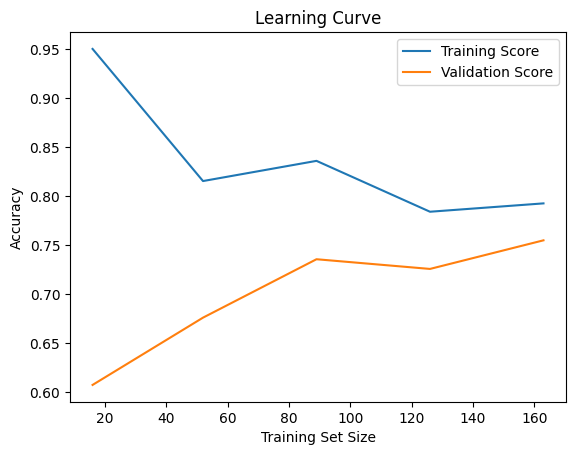

In [133]:
from sklearn.model_selection import learning_curve

# 计算学习曲线
train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy')

# 可视化
train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, val_scores_mean, label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [134]:
# 梯度提升树（如XGBoost）
from xgboost import XGBClassifier

# 训练XGBoost模型
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# 预测
y_pred_xgb = xgb_model.predict(X_train)

# 评估模型
accuracy_xgb = accuracy_score(y_train, y_pred_xgb)
print(f'XGBoost Training Accuracy: {accuracy_xgb:.2f}')

XGBoost Training Accuracy: 1.00


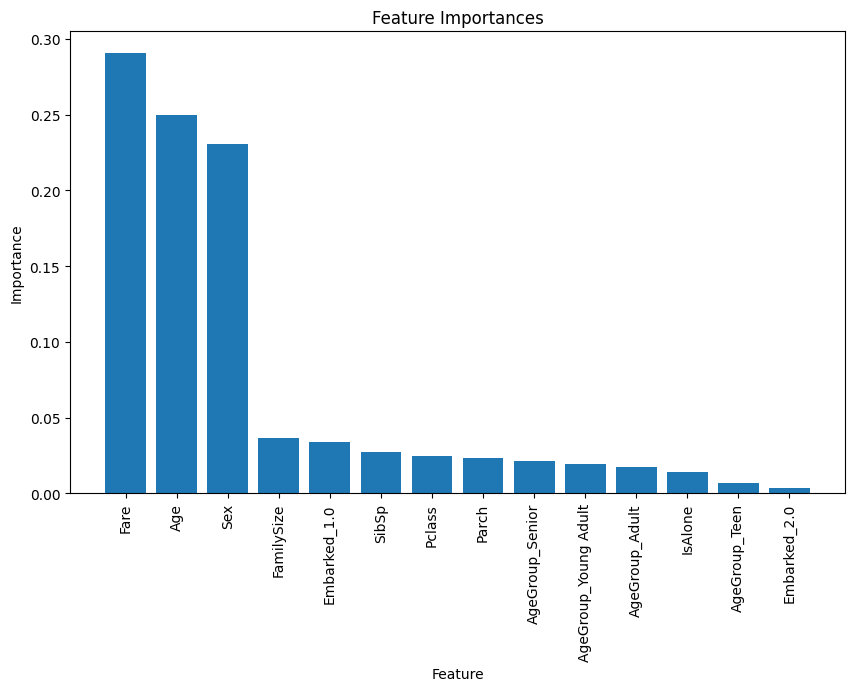

In [135]:
import numpy as np

# 获取特征重要性
feature_importances = rf_model.feature_importances_

# 可视化
features = X_train.columns
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

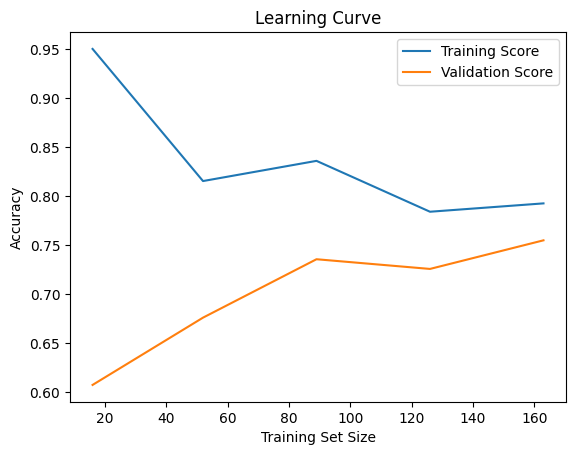

In [136]:
from sklearn.model_selection import learning_curve

# 计算学习曲线
train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy')

# 可视化
train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, val_scores_mean, label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()